In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 【問題1】線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [2]:
#雛形
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return

## 仮定関数

以下の数式で表される線形回帰の仮定関数を実装します。

$$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\ $$

$ x   : 特徴量ベクトル $

$ θ   : パラメータベクトル $

$ n : 特徴量の数 $

$ x_j : j番目の特徴量 $

$ θ_j : j番目のパラメータ（重み） $

特徴量の数
n
が任意の値に対応できる実装にする。

なお、ベクトル形式で表すと以下のようになる。

$$ h_\theta(x) = \theta^T \cdot x. $$

In [3]:
def _linear_hypothesis(X,theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
    y_pred :次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    
    theta:次の形のndarray, shape (1,n_features)    
    パラメータ
    """
    #yの算出
    y_pred = np.dot(X,theta.T)
    return y_pred

## 目的関数

以下の数式で表される線形回帰の目的関数を実装してください。

平均二乗誤差（mean square error : MSE）です。ただし、最急降下法をやりやすくするために2で割っています。

$$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m}. (h_\theta(x^{(i)})-y^{(i)})^2. $$

$ m : 入力されるデータの数 $

$ h_θ() : 仮定関数 $

$ x^{(i)} : i番目のサンプルの特徴量ベクトル $

$ y^{(i)} : i番目のサンプルの正解値 $

In [4]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    #誤差の計算
    error = y_pred - y.reshape(len(y),-1)
    #誤差を全て足す
    errors = (error**2).sum()
    #2で割るのと平均化
    mse = errors/(2*len(y))
    return mse,error

# 最急降下法

最急降下法により学習させます。j番目のパラメータの更新式は以下のようになります。
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}] $$

$ α : 学習率 $

$ i : サンプルのインデックス $

$ j : 特徴量のインデックス $

ScratchLinearRegressionクラスへメソッドを追加してください。これまでの雛形を参考にコメントアウト部分の説明も記述してください。

In [5]:
def _gradient_descent(theta, X, error,alpha):
    """
    最急降下法の計算

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples,n_features)
      推定した値    
    theta : 次の形のndarray, shape (1,n_features)
      パラメータ
    error : 次の形のndarray, shape (n_samples,)
      誤差
    alpha : スカラー
      学習率

    Returns
    ----------
    theta : 次の形のndarray, shape (1,n_features)
      更新後のパラメータ
    """
    #各勾配を計算
    grads = np.dot(error.T,X)/len(X)
    #それぞれのthetaを更新する。
    theta = theta - alpha*grads
    return theta ,grads

とりあえずそれぞれできたので組み込んで見る

In [6]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.intercept : 次の形のndarray, shape (1)
      切片
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    self.sum_grad: 次の形のndarray, shape (self.iter,)
      学習注の勾配合計の推移

    """

    def __init__(self, num_iter=10000, lr=1e-2, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 勾配合計を記録する配列を作成
        self.sum_grad = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
        y_pred :次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        パラメータ
        """
        #yの算出
        y_pred = np.dot(X,self.coef_.T)
        return y_pred
    
    def _MSE(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,1)
        推定した値
        y : 次の形のndarray, shape (n_samples,1)
        正解値
        Returns
        ----------
        mse : numpy.float
        平均二乗誤差
        """
        #誤差の計算
        error = y_pred - y
        #誤差を全て足す
        errors = (error**2).sum()
        #平均化
        mse = errors/len(y)
        return mse, error
    
    def _gradient_descent(self,X, error):
        """
        最急降下法の計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples,n_features)
          推定した値    
        error : 次の形のndarray, shape (n_samples,)
          誤差


        Returns
        ----------
        coef_ : 次の形のndarray, shape (1,n_features)
          更新後のパラメータ
        """
        #各勾配を計算
        self.grads = np.dot(error.T,X)/len(X)
        #それぞれのcoef_を更新する。
        self.coef_ -= self.lr*self.grads
        
        return self.coef_
    
    def fit(self, X, y, X_val=None, y_val=None, grad_thre = 0.001,plot=True):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        grad_thre : float
            勾配が一定の値以下になったらイテレーションを止めるしきい値
        plot : True or False
            学習曲線をplotするかどうか
        """
        
        #Xを複製する
        X_copy = X.copy()
        # バイアス項が必要な場合は追加
        if self.no_bias == False:
            #all1の定数の追加
            X_copy = np.hstack((np.ones((len(X),1)),X_copy))
        #Xの特徴量の数
        n_features = X_copy.shape[1]
        #仮coef_の作成（初期値はランダム）
        self.coef_ = np.random.rand(1,n_features)
        y = y.reshape(-1,1)
        
        #学習開始
        for i in range(self.iter) :
            #y_predを算出
            self.y_pred = self._linear_hypothesis(X_copy)
            #誤差を格納
            self.loss[i], error = self._MSE(self.y_pred,y)
            #coefを更新
            self.coef_ = self._gradient_descent(X_copy,error)
            #勾配合計をリストに格納
            self.sum_grad[i] = self.grads.sum()
            
            #検証データが入力された場合の処理
            if (X_val is not None)&(y_val is not None):
                #X_valを現時点でのcoef_を使って予測する
                self.val_pred = self.predict(X_val)
                #予測した値と、y_valとの誤差を確認、格納
                self.val_loss[i],error_val = self._MSE(self.val_pred,y_val)
                #後で残差プロットをするため、self.y_valを残しておく
                self.y_val = y_val
            
            #verboseをTrueにした際は学習過程を出力(100回に一回)
            if self.verbose:
                if i % 100 == 0:
                    print('mse:{:,.3}'.format(self.loss[i]))
            
            # 勾配の絶対値がそれなりにひくくなったらイテレーションを止める。
            if abs(self.grads.sum()) < grad_thre:
                print('grad < {:,.6}'.format(grad_thre))
                print('iter {:,}回で学習終了'.format(i))
                break
            
            # 最後まで学習した場合も終了メッセージ
            if i == self.iter -1:
                print('iter {:,}回で学習終了'.format(i))

        
        #イテレーションが途中で止まった場合は初めに用意していて残った0配列を削除する
        self.loss = self.loss[self.loss != 0]
        self.sum_grad =  self.sum_grad[self.sum_grad != 0]

        #決定係数を取得する
        self.r_score = 1- (self.loss[-1]/y.var())
        
        #検証データがある場合の決定係数
        if (X_val is not None)&(y_val is not None):
            self.val_loss = self.val_loss[self.val_loss != 0]
            self.r_score_var = 1- (self.val_loss[-1]/y_val.var())
            
        #interceptをcoefから渡して上げる。
        if self.no_bias == False:
            self.intercept = self.coef_[:,0]
            
        #残差プロットの為にyをselfで残しておく
        self.y = y      
        #残差プロット
        if plot:
            self._residualplot(self.y_pred,self.y,title='train_残差プロット')
            if (X_val is not None)&(y_val is not None):
                self._residualplot(self.val_pred,self.y_val,title='test_残差プロット')

        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        pred:  次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        #バイアスがある場合とない場合でpred結果分け                       
        if self.no_bias == False:            
            pred = (self.coef_[:,0] + np.sum(self.coef_[:,1:] * X,axis=1)).reshape(len(X),1)
        else:
            pred = np.sum((self.coef_ * X),axis=1).reshape(len(X),1)
        return pred
    
    def _residualplot(self,y_pred,y,title='Residual Plot'):
        plt.scatter(y_pred, y_pred - y, color = 'blue')      # 残差をプロット
        plt.title(title)                                # 図のタイトル
        plt.xlabel('Predicted Values')                            # x軸のラベル
        plt.ylabel('Residuals')                                   # y軸のラベル
        plt.grid()                                                # グリッド線を表示
        plt.show();

## 動作確認

In [7]:
df = pd.read_csv('train.csv')
df = df[['YearBuilt','GrLivArea','SalePrice']]
X = df.drop('SalePrice',axis=1)
y = df[['SalePrice']].values
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [8]:
scratch = ScratchLinearRegression(lr=1e-8)

iter 9,999回で学習終了


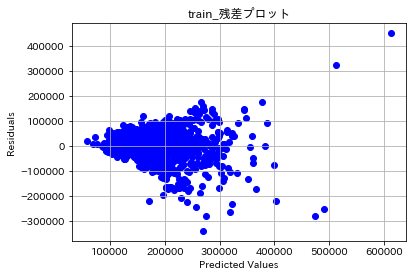

In [9]:
scratch.fit(X,y)

In [10]:
scratch.r_score

0.5052136285006973

標準化した場合なども確認

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


mse:3.84e+10
mse:6.85e+09
mse:2.68e+09
mse:2.12e+09
mse:2.05e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
mse:2.04e+09
grad < 1e-06
iter 2,611回で学習終了


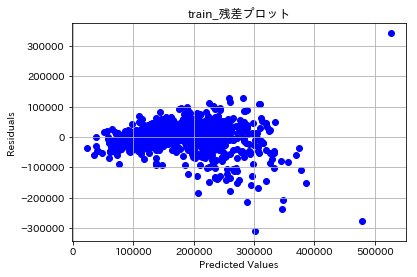

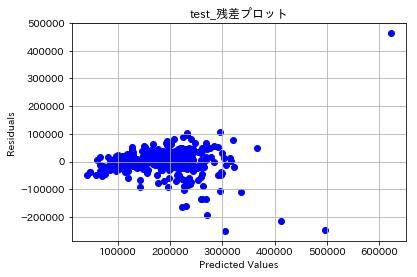

In [12]:
scratch = ScratchLinearRegression(lr=1e-2,verbose=True)
scratch.fit(X_train,y_train,X_val=X_test,y_val=y_test,grad_thre=0.000001)

In [13]:
print('trainの決定係数{:.3},valの決定係数{:.3}'.format(scratch.r_score,scratch.r_score_var))

trainの決定係数0.667,valの決定係数0.617


# 【問題2】学習曲線のプロット

In [14]:
#学習曲線をプロットする関数
def loss_plot(train_loss,val_loss=None,title='学習曲線',train_label='train_loss',test_label='test_loss'):
    #lossのリストを入れればプロットする
    sns.lineplot(data = train_loss,label=train_label,lw=5)
    #もし検証データがあればそれを入れた場合にもプロットする
    if val_loss is not None:
        sns.lineplot(data = val_loss,label=test_label,lw=5)
    plt.title(title);

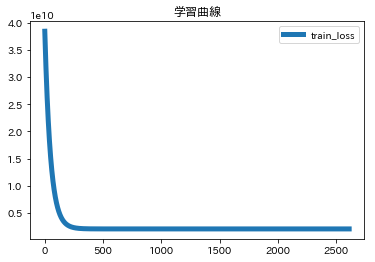

In [15]:
#可視化
loss_plot(scratch.loss)

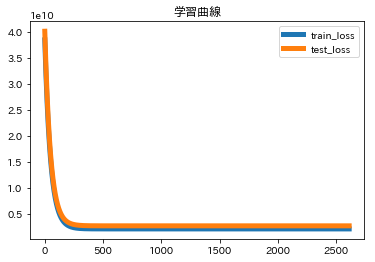

In [16]:
#検証データも含めて可視化
loss_plot(scratch.loss,scratch.val_loss)

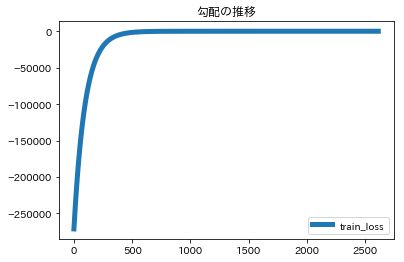

In [17]:
#他のデータも可視化出来る
loss_plot(scratch.sum_grad,title='勾配の推移')

# 【問題3】（アドバンス課題）バイアス項の除去

バイアスがあるないで比較する。

In [18]:
df = pd.read_csv('train.csv')
df = df[['YearBuilt','GrLivArea','SalePrice']]
X = df.drop('SalePrice',axis=1)
y = df[['SalePrice']].values
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
#それぞれバイアスあるないでインスタンス化
nobias_scratch = ScratchLinearRegression(lr=0.01,no_bias=True)
bias_scratch = ScratchLinearRegression(lr=0.01,no_bias=False)

nobiasmodel
grad < 1e-06
iter 2,442回で学習終了


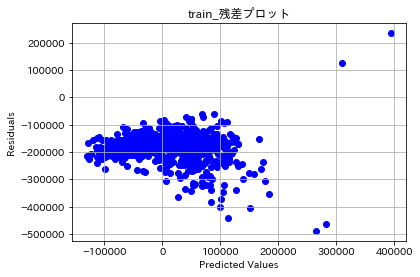

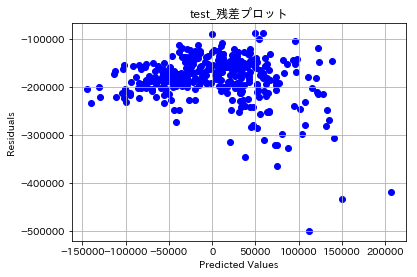

------------------------------
biasmodel
grad < 1e-06
iter 2,554回で学習終了


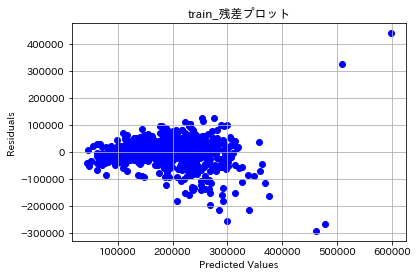

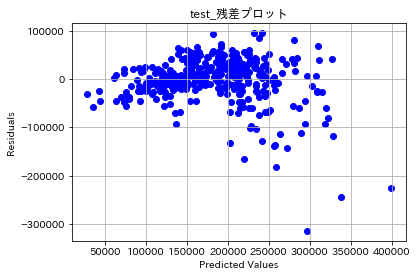

In [20]:
#学習
print('nobiasmodel')
nobias_scratch.fit(X_train,y_train,X_val=X_test,y_val=y_test,grad_thre=0.000001)
print('-'*30)
print('biasmodel')
bias_scratch.fit(X_train,y_train,X_val=X_test,y_val=y_test,grad_thre=0.000001)

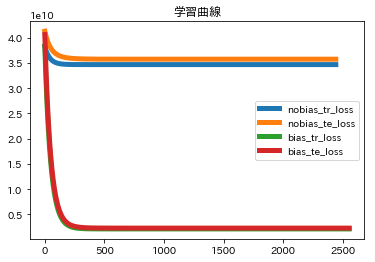

In [21]:
#学習曲線の比較
loss_plot(nobias_scratch.loss,nobias_scratch.val_loss,
          train_label='nobias_tr_loss',test_label='nobias_te_loss')
loss_plot(bias_scratch.loss,bias_scratch.val_loss,
          train_label='bias_tr_loss',test_label='bias_te_loss')

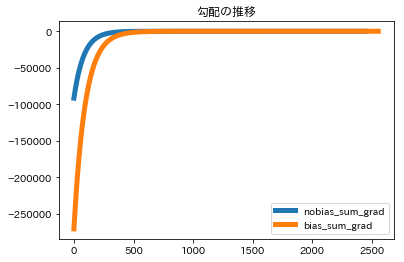

In [22]:
#勾配の推移
loss_plot(nobias_scratch.sum_grad,bias_scratch.sum_grad,
          train_label='nobias_sum_grad',test_label='bias_sum_grad',title='勾配の推移')

In [23]:
#coefの比較
print('nobias_coef{}'.format(nobias_scratch.coef_))
print('bias_coef{}'.format(bias_scratch.coef_))

#Rスコアで比較
print('nobiasmodel_r_score{},test_r_score{}'.format(nobias_scratch.r_score,nobias_scratch.r_score_var))
print('biasmodel_r_score{},test_r_score{}'.format(bias_scratch.r_score,bias_scratch.r_score_var))

#誤差の平均値は
print('biasモデルのtrainデータの誤差の平均値{}'.format((y_train - bias_scratch.predict(X_train)).sum()/len(X_train)))
print('biasモデルのtrainデータの誤差の平均値{}'.format((y_test - bias_scratch.predict(X_test)).sum()/len(X_test)))
print('nobiasモデルのtrainデータの誤差の平均値{}'.format((y_train - nobias_scratch.predict(X_train)).sum()/len(X_train)))
print('nobiasモデルのtrainデータの誤差の平均値{}'.format((y_test - nobias_scratch.predict(X_test)).sum()/len(X_train)))

nobias_coef[[30297.42918334 45567.20351799]]
bias_coef[[180371.70744337  31055.3787506   48416.27286426]]
nobiasmodel_r_score-4.678909285875516,test_r_score-4.1942942777704495
biasmodel_r_score0.6484134961801021,test_r_score0.6653133364655331
biasモデルのtrainデータの誤差の平均値1.6135579298280146e-06
biasモデルのtrainデータの誤差の平均値2197.9537833050567
nobiasモデルのtrainデータの誤差の平均値180317.23152471645
nobiasモデルのtrainデータの誤差の平均値60911.02966249813


**考察**  
残差プロットの形はほとんど変わらないけど、予測値がちょうど切片の分(180371)だけ下にずれてる気がする。  
学習曲線もbias無いモデルは下がっているが高い、、、  
決定係数はハチャメチャ。

バイアス項がない場合だと、X＝０付近でyの値が０になる必要がある。  
原点から見てX、ｙの値が線形な場合であれば対応出来るが、そうでは無い場合は対応できない。  
とおもいます。。。

### 念の為sklearnの動きを確認してみる。

In [24]:
#データの撮り直し
df = pd.read_csv('train.csv')
df = df[['YearBuilt','GrLivArea','SalePrice']]
X = df.drop('SalePrice',axis=1)
y = df[['SalePrice']].values
X = scaler.fit_transform(X)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
#interceptなしでインスタンス化、fit,pred
skmodel = LinearRegression(fit_intercept=False)
skmodel.fit(X,y)
y_pred = skmodel.predict(X)

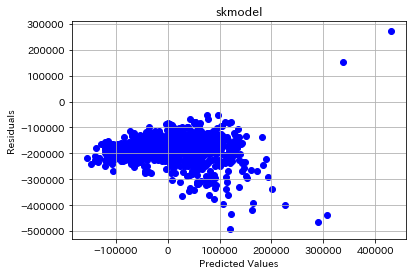

In [26]:
#可視化
plt.scatter(y_pred, y_pred - y, color = 'blue')      # 残差をプロッ
plt.title('skmodel')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示
plt.show();

grad < 0.001
iter 1,526回で学習終了


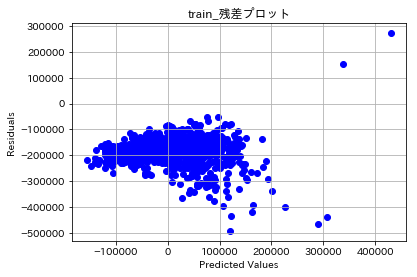

In [27]:
#スクラッチモデルの可視化
nobias_scratch.fit(X,y)

### ほぼ同様の結果！！
**interceptが無い場合は最適解として、interceptがある場合と比較してintercept分予測がずれる事が確認できた^^**

# 【問題4】（アドバンス課題）特徴量の多次元化

多項式回帰を試してみる

In [28]:
df = pd.read_csv('train.csv')
df = df[['YearBuilt','GrLivArea','SalePrice']]
X = df.drop('SalePrice',axis=1)
y = df[['SalePrice']]

In [29]:
#2次の項までの列を取得してみる。
poly2 = PolynomialFeatures(degree=2,include_bias=False)
poly2.fit(X)
polyX = pd.DataFrame(poly2.transform(X))
polyX.columns = poly2.get_feature_names(input_features=['YearBuilt','GrLivArea'])
polyX

,YearBuilt,GrLivArea,YearBuilt^2,YearBuilt GrLivArea,GrLivArea^2
0,2003.0,1710.0,4012009.0,3425130.0,2924100.0
1,1976.0,1262.0,3904576.0,2493712.0,1592644.0
2,2001.0,1786.0,4004001.0,3573786.0,3189796.0
3,1915.0,1717.0,3667225.0,3288055.0,2948089.0
4,2000.0,2198.0,4000000.0,4396000.0,4831204.0
5,1993.0,1362.0,3972049.0,2714466.0,1855044.0
6,2004.0,1694.0,4016016.0,3394776.0,2869636.0
7,1973.0,2090.0,3892729.0,4123570.0,4368100.0
8,1931.0,1774.0,3728761.0,3425594.0,3147076.0
9,1939.0,1077.0,3759721.0,2088303.0,1159929.0


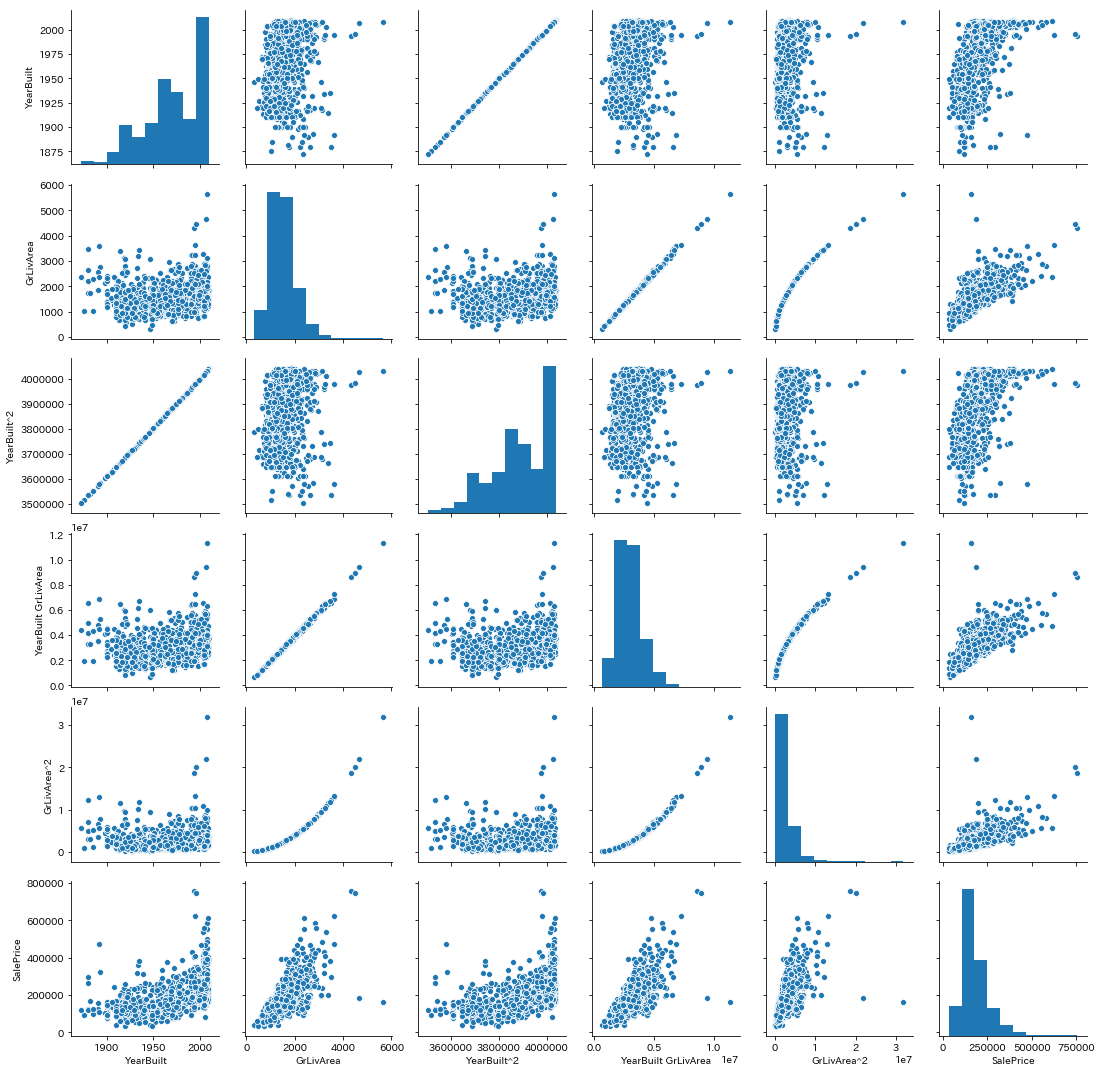

In [30]:
sns.pairplot(data=pd.concat([polyX,y],axis=1))

追加した項とselepriceとの間の関係は追加する前とほとんど同じなので、あまり変化は無さそうに思える。けどとりあえずやってみる。

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


iter 9,999回で学習終了


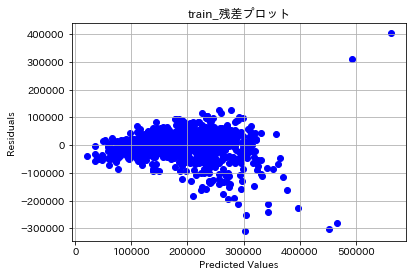

grad < 0.001
iter 1,894回で学習終了


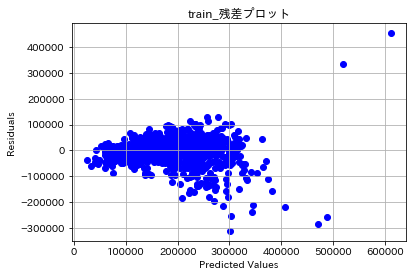

In [31]:
#それぞれpolynomialかどうかでインスタンス化を分ける
poly_model = ScratchLinearRegression(lr=0.01)
normal_model = ScratchLinearRegression(lr=0.01)

#標準化
polyX = scaler.fit_transform(polyX)
X = scaler.fit_transform(X)
y = y.values

#学習
poly_model.fit(polyX,y)
normal_model.fit(X,y)

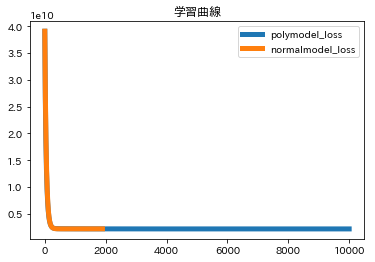

In [32]:
#学習率の推移
loss_plot(poly_model.loss,normal_model.loss,
          train_label='polymodel_loss',test_label='normalmodel_loss')

列を増やしてみてもあまりかわらない。。。
列が増えた分トータル勾配は増えているので、収束はしなかったが結果は変わらず。。。

### 対数変換したもので再度試してみる

grad < 0.001
iter 933回で学習終了


/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


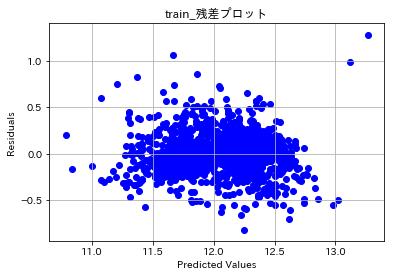

grad < 0.001
iter 1,894回で学習終了


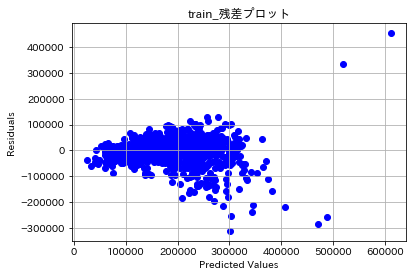

In [33]:
#対数用と、ノーマルのモデルで分ける
log_model = ScratchLinearRegression(lr=0.01)
normal_model = ScratchLinearRegression(lr=0.01)

#データの再読込
df = pd.read_csv('train.csv')
df = df[['YearBuilt','GrLivArea','SalePrice']]
X = df.drop('SalePrice',axis=1)
y = df[['SalePrice']].values
#対数変換
X_log = np.log(X)
y_log = np.log(y)
#標準化
X_log = scaler.fit_transform(X_log)
X = scaler.fit_transform(X)

#学習
log_model.fit(X_log,y_log)
normal_model.fit(X,y)

対数変換後はだいぶ変わった。

単位が違うのでなんとも言えないが、対数変換後の方がしっかり予測できている気がする

In [34]:
print('対数変換後のR_score:{:.3}　ノーマルのR_score{:.3}'.format(log_model.r_score,normal_model.r_score))

対数変換後のR_score:0.715　ノーマルのR_score0.654


**R_scoreは改善！！当てはまり具合がアップした。**

# 【問題5】（アドバンス課題）更新式の導出

最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}] $$

以下の式から説明をはじめることができます。

$$ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\ $$

回答

$ u = (h_\theta(\mathbf{x})-\mathbf{y})と置きJ(\theta)をuについて、uを\thetaについて微分していく $  
$$ \begin{align}\frac{\partial}{\partial u}J(\theta) &= \frac{\partial}{\partial u}\frac{1 }{ 2m}\sum u^2 \\
&= \frac{1 }{ m}\sum u\\
&= \frac{1 }{ m}\sum (h_\theta(\mathbf{x})-\mathbf{y}) \\
\frac{\partial}{\partial \theta_j}u &= \frac{\partial}{\partial \theta_j}(h_\theta(\mathbf{x})-\mathbf{y})\\ 
&= \frac{\partial}{\partial \theta_j}\sum ( \mathbf{\theta}^T \cdot \mathbf{x})-\mathbf{y})\\
&= \sum \mathbf{x}\end{align} $$  
それぞれを掛け合わせることで

$$ \begin{align}\frac {\partial J} {\partial \theta} &= \frac {\partial J}{\partial u} \cdot \frac {\partial u}{\partial \theta}\\
&=\frac{1 }{ m}\sum [(h_\theta(\mathbf{x})-\mathbf{y})\cdot\mathbf{x}] \end{align} $$

となる。  
これは$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}] $　の式の学習率以降の式となるので、変換完了

# 【問題6】（アドバンス課題）局所最適解の問題

線形回帰の場合は最適解を求めるということは

$$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m}. (h_\theta(x^{(i)})-y^{(i)})^2. $$

での目的件数を最小化することと同値となる。  
この目的関数はただの二次関数なので、勾配が0の点は各シータに対して１点なので、最適解が導かれる。

# 【問題7】スクラッチで学べることは何か

ライブラリを使うだけでなくスクラッチをすることで学べたこと
- 実際のライブラリへの理解が深まる
- プログラミングの理解、経験が深まる
- アルゴリズムの理解が深まる
- アルゴリズムに使われている細かい要素を一つひとつ理解することで、他のアルゴリズムへの理解も深まる。
- 新たな手法やアルゴリズムが発表された際に、理解が深まり実装もしやすい
- 基本的なアルゴリズムをスクラッチできれば、後はそれぞれの要素の組み合わせで大抵のものは解決出来そう

インポートデータでも出来るのか。

In [35]:
# sysライブラリをインポート
import sys

# 作成した各クラスが格納してあるフォルダを指定する
sys.path.append('/Users/takahashiakira/Documents/DIC/diveintocode-ml/ ml-scratch/model/')

In [36]:
# 作成したロジスティック回帰モデルをインポート
from linear_regression import ScratchLinearRegression

grad < 0.001
iter 1,894回で学習終了


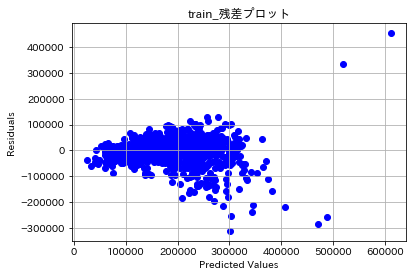

In [37]:
scratch = ScratchLinearRegression()
scratch.fit(X,y)

できた。